In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle



In [2]:
df = pd.read_csv('bluebook-for-bulldozers\TrainAndValid.csv', 
                 low_memory=False, parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#df.columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

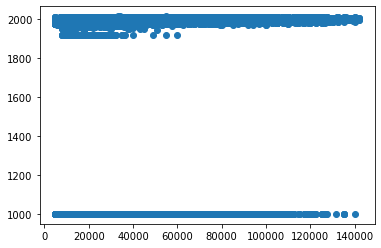

In [6]:
plt.scatter(df['SalePrice'], df['YearMade'])

In [7]:
len(np.where(df['YearMade']==1000 )[0])

39391

In [8]:
len(df['YearMade'])

412698

In [9]:
df.YearMade.head(10)

0    2004
1    1996
2    2001
3    2001
4    2007
5    2004
6    1993
7    2001
8    2008
9    1000
Name: YearMade, dtype: int64

In [10]:
# fill the YearMade with the mean that find from ModelID.
c=0
for i, year in enumerate (df['YearMade']):
    d = []
    k = []
    if year == 1000:
        d = [np.where(df['ModelID'] == df['ModelID'][i])][0]
        #df['YearMade'][i] = np.mean[np.where(d[0] > 1000)]
        for j in d[0]:
            if df.YearMade[j]!=1000:
                k.append(df.YearMade[j])
        if k==[]:
            continue
        df['YearMade'][i] = round(np.mean(k))       
#         if c <=100:
#             print(d[0], '-->', df['YearMade'][i], k)
#             c+=1

C:\Users\Kian\anaconda3\envs\kian\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [11]:
#df['YearMade'] = np.where(df['YearMade']==1000, (round(np.mean([df['YearMade'][i]for i, modid in enumerate (df['ModelID'])if (modid == df['ModelID'][i]) and (df['YearMade'][i]!= 1000)]))),df['YearMade'] )

In [12]:
len(df['YearMade'])
#401125

412698

In [13]:
df.head(40)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1982,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [27]:
df[649:650]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
649,1141387,10750.0,1064481,26285,121,3.0,1000,0.0,NaN,2011-08-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
len(df) - (len(np.where(df['YearMade']==1000)[0]))

411934

In [39]:
df.drop(np.where(df['YearMade']==1000)[0], axis=0, inplace=True)

In [40]:
df.shape

(411934, 53)

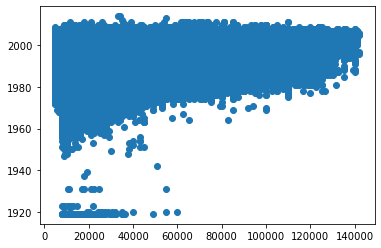

In [41]:
plt.scatter(df['SalePrice'], df['YearMade']);

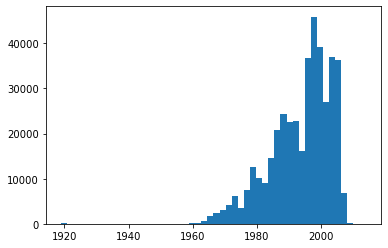

In [42]:
plt.hist(df['YearMade'],bins=50);

In [43]:
np.unique(df['YearMade'], return_counts=True)

(array([1919, 1920, 1923, 1931, 1937, 1939, 1942, 1947, 1948, 1949, 1950,
        1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
        1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
        1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
        1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
        1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64),
 array([  127,    17,    10,     9,     1,     1,     1,     1,     3,
            1,     8,     8,     6,     8,     5,     5,    24,    24,
           25,    28,    99,    99,   146,   268,   458,   679,   965,
         1135,  1332,  1649,  1391,  1810,  2371,  2587,  3525,  3419,
         2893,  4668,  6390,  6293,  5266,  4824,  3576,  5390,  7490,
         7092,  8754, 11962, 11865, 12368, 12473, 10090,  9686, 13169,
        16109, 17989, 18688, 22047, 23839, 21164, 180

In [44]:
df['saledate'].dtype, df['saledate'][0]

(dtype('<M8[ns]'), Timestamp('2006-11-16 00:00:00'))

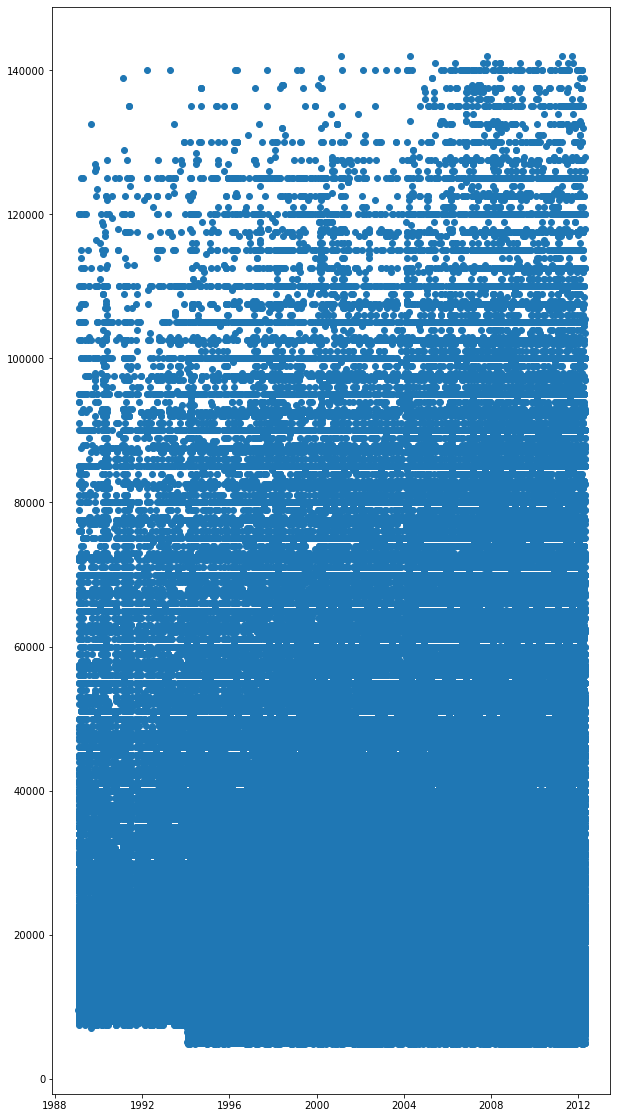

In [45]:
fig = plt.figure(figsize=(10,20))
plt.scatter(df['saledate'],df['SalePrice']);

In [46]:
print(np.unique(df['MachineID'], return_counts=True))

(array([      0,       2,      13, ..., 2486275, 2486276, 2486330],
      dtype=int64), array([2, 1, 1, ..., 1, 1, 1], dtype=int64))


In [52]:
d = np.unique(df['auctioneerID'], return_counts=True)
print(len(d[0]))

20084


In [55]:
pickle.dump(df, open('TrainAndValidFillYearMade.plk', "wb") )

In [57]:
df = pickle.load(open('TrainAndValidFillYearMade.plk', 'rb'))
df.shape

(411934, 53)

In [ ]:
X = pd.dataFrame()
X['ModelID',]=df[]
y= df['SalePrice']